# Project 4: Happy or wealthy?

## Introduction

Since I was a child I have been interested in money, may be not because of what I could buy with it but because of what I could make, so I could not get out of my mind that person (or those people, popular knowledge might be wider than you think) who is always telling to me 'Hey look, actually having money won't make you happy, it has nothing to do with that'.

And so, that is basically the reason of this project, I was curious about analyzing real data to answer this question, my question, am I being fooled? In other words, Is there any relation between richness and happiness?

So in order to have a more interesting dataset I will be analysing more than just happiness, I will try to understand why wealthness happens and what causes it measuring some different variables:


### Happiness: I will be using the happiness world report of 2015 for this objective, a worldwide survey based on the perception of the people. It will be the only non-objective variable of all of them, and the most important.

### GDP (Per Capita): Normalized measure of the wealthness of the citizens of a country, given by the world bank

### Personal freedom index: New study about personal freedom per country accomplished by the CATO Institute, measuring more than 120 variables to compute this index 

### Economic freedom index: Study with more than 30 economic variables measuring the ease of making business on those.

### Gini coefficient: This coefficient measures the inequality of a country, comparing the people who have the most important part of the wealthness to the ones who haves the less


 Having said that, even if happiness can not be measured, all the others measurements are approximations to a bias that I am supposing is close to the reality, as of course we can not measure exactly the speech or religious freedom, but we do know that if you say you do not believe in god and you are treated like a freak because of it you are not as free as you could be in another place.
 So even if we can not say those 'objectives' indexes are the reality, we will treat them as tools that can approximate to it.

## Data Wrangling

First of all, we start importing all the necessary libraries (NumPy, pandas...) so we can get the datasets and work with them:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set

w_happiness = pd.read_csv('2017.csv')
w_economic = pd.read_csv('economic_freedom_index2019_data.csv',  encoding='latin-1')
w_human = pd.read_csv('hfi_cc_2018.csv')
gdp = pd.read_csv('API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2_41041.csv', skiprows=3)
gini = pd.read_csv('API_SI.POV.GINI_DS2_en_csv_v2_41010.csv', skiprows=3)

Then we can have a look to the datasets:

In [2]:
w_happiness.head()
'''As we can see, the only valuable thing of this dataset is the final score and the rank, because even if we are measuring freedom and and gdp per capita (so we could think it is not necessary to use the next datasets), It is not real but what people think about those topics, so we can not measure them and so we need what we will be using later '''

'As we can see, the only valuable thing of this dataset is the final score and the rank, because even if we are measuring freedom and and gdp per capita (so we could think it is not necessary to use the next datasets), It is not real but what people think about those topics, so we can not measure them and so we need what we will be using later '

In [5]:
w_economic.head()
#So from  now on I won't comment the datasets check as I will be picking what is necessary for the study

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,Albania,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,Algeria,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,Angola,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,Argentina,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6


In [6]:
w_human.head()

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


In [7]:
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,33732.847450,35492.618487,35498.982089,37419.892817,38223.372261,38249.054869,38390.271649,39454.629831,NaN,NaN
1,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1951.558504,NaN
2,Angola,AGO,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6440.976270,NaN
3,Albania,ALB,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,9628.003545,10207.753519,10526.255328,10571.007488,11259.289824,11662.044933,11868.211515,12930.067676,NaN,NaN
4,Andorra,AND,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
'''So with this one there is a problem: There is almost no data about any country, that's due to the
    Difficult of the study so they do it once in a while and with just a few countries, so for this study
    We will just be picking those countries, ignoring the rest, so instead of all the countries we had data
    at first we will just have like 70-60 and from the year 2010'''
gini.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Now we will select the columns

In [11]:
w_happiness = w_happiness[['Country', 'Happiness.Rank', 'Happiness.Score']]
w_economic = w_economic[['Country Name','World Rank', 'Unemployment (%)', 'GDP Growth Rate (%)', '2019 Score']].sort_values('World Rank').reset_index(drop = True)
w_human = w_human[['countries', 'hf_rank', 'hf_score',]].loc[w_human['year'] == 2016].sort_values('hf_rank').reset_index(drop = True)
gdp = gdp[['Country Name', '2018']]
gdp = gdp.dropna()
gdp = gdp.astype({"Country Name": object, "2018": int})
gini =gini[['Country Name','2010']]
gini = gini.dropna().reset_index(drop = True)

#### So once we have done all of this, let's merge all the tables:

In [41]:
merge1 = pd.merge(w_happiness, w_economic, how='left', left_on=['Country'], right_on=['Country Name'])
merge1 = merge1.dropna()
merge2 = pd.merge(merge1, w_human, how='left', left_on=['Country Name'], right_on=['countries'])
merge3 = pd.merge(merge2, gdp, how='left', left_on=['Country Name'], right_on=['Country Name'])
merge3 = merge3.dropna().drop('Country', axis = 1)
final_tab = pd.merge(merge3, gini, how='left', left_on=['Country Name'], right_on=['Country Name'])
final_tab = final_tab.rename(columns={"Country Name": "country", "2010": "gini", "2018": "gdp_ppp","Happiness.Rank": "h_rank","Happiness.Score": "h_score","World Rank": "ef_rank", "GDP Growth Rate (%)": "growth_rate", "Unemployment (%)": "unemployment", '2019 Score':'ef_score'})
final_tab = final_tab.drop('countries', axis = 1)
final_tab = final_tab[['country', 'h_rank', 'hf_rank', 'ef_rank', 'h_score', 'ef_score', 'hf_score',
       'gini', 'unemployment', 'growth_rate', 'gdp_ppp']]
final_tab = final_tab.dropna().reset_index(drop = True)
final_tab['ef_score'] = final_tab['ef_score']/10
final_tab = final_tab.sort_values('ef_rank')
'''So now we have a renamed and completed table where we will be working on, but as said before
    we have a little problem, we dropped countries we didn't have enough info to cope with them
    so we now have some 'void' ranks (as we are ordering the values by ef_rank we can see that
    switzerland is not the first but the fourth) but as we decided to delete that data, we will
    pretend that all the rankings are real, so switzerland will be the first and australia the second 
    in this one'''
final_tab.head()

,country,h_rank,hf_rank,ef_rank,h_score,ef_score,hf_score,gini,unemployment,growth_rate,gdp_ppp
3,Switzerland,4,2.0,4.0,7.494,8.19,8.787759,32.6,4.8,1.1,68943.0
8,Australia,10,4.0,5.0,7.284,8.09,8.582219,34.7,5.6,2.3,51544.0
13,Ireland,15,8.0,6.0,6.977,8.05,8.504565,32.3,6.4,7.8,84069.0
17,United Kingdom,19,8.0,7.0,6.714,7.89,8.497918,34.4,4.3,1.8,46239.0
6,Canada,7,5.0,8.0,7.316,7.77,8.565863,33.6,6.3,3.0,47870.0


### Correlation

#### As we already have a good table to work with, let's do the cool stuff now:

In [19]:
corr = final_tab.corr()
corr.style.background_gradient(cmap='coolwarm')

,h_rank,hf_rank,ef_rank,h_score,ef_score,hf_score,gini,growth_rate,gdp_ppp
h_rank,1,0.662503,0.647505,-0.993593,-0.650393,-0.672508,0.28279,0.436157,-0.750669
hf_rank,0.662503,1,0.804672,-0.680897,-0.814261,-0.993922,0.311391,0.431204,-0.770302
ef_rank,0.647505,0.804672,1,-0.66215,-0.985707,-0.798417,0.315703,0.223665,-0.711618
h_score,-0.993593,-0.680897,-0.66215,1,0.673907,0.693794,-0.311903,-0.42614,0.768974
ef_score,-0.650393,-0.814261,-0.985707,0.673907,1,0.81503,-0.336764,-0.216113,0.749231
hf_score,-0.672508,-0.993922,-0.798417,0.693794,0.81503,1,-0.340755,-0.433644,0.801336
gini,0.28279,0.311391,0.315703,-0.311903,-0.336764,-0.340755,1,-0.042458,-0.475954
growth_rate,0.436157,0.431204,0.223665,-0.42614,-0.216113,-0.433644,-0.042458,1,-0.310173
gdp_ppp,-0.750669,-0.770302,-0.711618,0.768974,0.749231,0.801336,-0.475954,-0.310173,1


#### So here we can see we have some correlated values (even though we have to ignore those related with score - ranking, as they are actually, the same), enough to have some insights already:

### GDP: Very correlated to : Happiness, Human freedom and Economic freedom

### Gini: Slight correlation with everything but the growth rate, and kind of correlated with GDP

### Growth rate: Slight correlation with economic freedom and kind of correlated with both, personal freedom and happiness

So, with these insights let's plot what we have seen to understand what is really happening

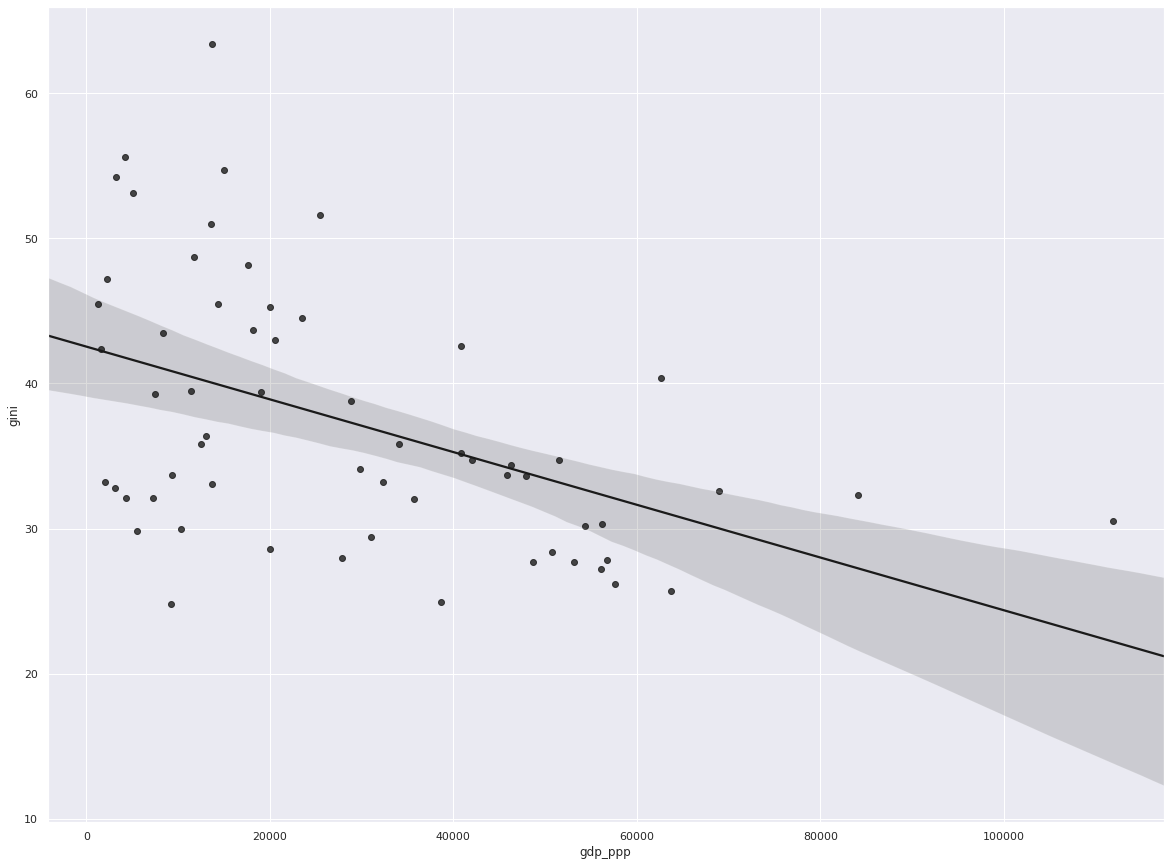

In [21]:
sns.set()
plt.figure(figsize=(20, 15))
sns.regplot("gdp_ppp", "gini", data=final_tab, color="k", label='Gini index')

plt.show()

So in this graph we can see how gini index is related to the wealthiness of the people of the country; the richer, the more equal they are, and even if this doesn't mean happiness I still think it's really important because it is not the same living in a good neighborhood but having a bad one 200m away that having a safe city, for every place you want to go, so even if it is not happiness, it does help

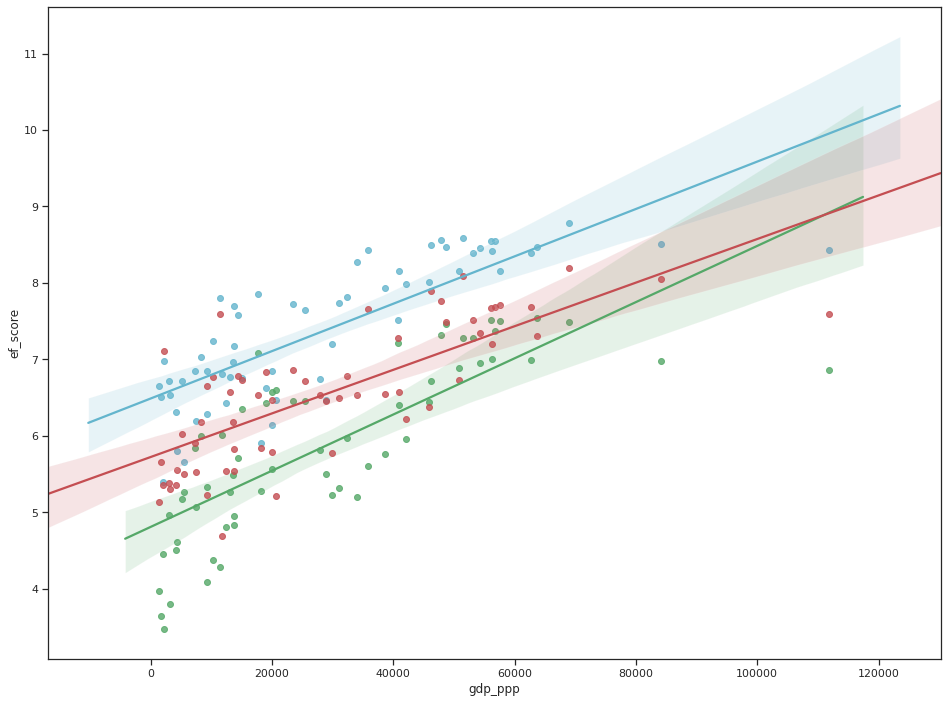

In [40]:
plt.figure(figsize = (16,12))
sns.regplot("gdp_ppp", "h_score", data=final_tab, color="g", label = 'Happiness')
sns.regplot("gdp_ppp", "hf_score", data=final_tab, color="c", label = 'Social freedom')
sns.regplot("gdp_ppp", "ef_score", data=final_tab, color="r", label = 'Economic Freedom')

plt.show()

So in this graph we can see how gdp is related to both indexes and happiness, being actually the last one the second most important after the personal freedom (what, in theory, shouldn't be like that at all, considering that the economic freedom should be the most important factor for the economy)

And so, we have already answered our question: There is not just a correlation between wealthiness and happiness but is the second strongest of all of them, even stronger than the economic freedom index and the gdp.

But, how can it be possible? Honestly, I do not know, and that was not the point of this study, but still I do have an hypothesis about it: 

Richness does not mean that you can have four castles, it just means that you can have a nice feeding, you are able to have healthy relationships with other people, you can go to the doctor every time you need it and of course, you can have free time to spend on what really makes you happy.

In conclusion, being a millionaire will not help, but it will do having a good salary